<a href="https://colab.research.google.com/github/junghyeon0114/python_machine/blob/main/Ch_8_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#05 감성분석

문서 내 텍스트가 나타내는 여러 가지 주관적인 단어와 문맥을 기반으로 감성 수치를 계산하는 방법을 이용.

긍정 감정 지수와 부정 감정 지수로 구성되며 이들 지수를 합산해 긍정 감성 또는 부정 감성을 결정


- 지도 학습 : 학습 데이터와 타깃 레이블 값을 기반으로 감성 분석 학습을 수행한 뒤 이를 기반으로 다른 데이터의 감성 분석을 예측하는 방법으로 일반적인 텍스트 기반의 분류와 거의 동일합니다.

- 비지도학습 : 일종의 감성 어휘 사전 이용. Lexicon은 감성 분석을 위한 용어와 문맥에 대한 다양한 정보를 가지고 있으며, 이를 이용해 문서의 긍정적, 부정적 감성 여부를 판단.



**지도학습 기반 감성 분석 실습 - IMDB 영화평**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd

review_df=pd.read_csv('/content/drive/MyDrive/파이썬 머신러닝 데이터/labeledTrainData.tsv/labeledTrainData.tsv', header=0, sep="\t", quoting=3)
review_df.head(3)

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."


In [5]:
# 텍스트 구성 확
print(review_df['review'][0])

"With all this stuff going down at the moment with MJ i've started listening to his music, watching the odd documentary here and there, watched The Wiz and watched Moonwalker again. Maybe i just want to get a certain insight into this guy who i thought was really cool in the eighties just to maybe make up my mind whether he is guilty or innocent. Moonwalker is part biography, part feature film which i remember going to see at the cinema when it was originally released. Some of it has subtle messages about MJ's feeling towards the press and also the obvious message of drugs are bad m'kay.<br /><br />Visually impressive but of course this is all about Michael Jackson so unless you remotely like MJ in anyway then you are going to hate this and find it boring. Some may call MJ an egotist for consenting to the making of this movie BUT MJ and most of his fans would say that he made it for the fans which if true is really nice of him.<br /><br />The actual feature film bit when it finally sta

In [6]:
import re

#  html 태그는 replace 함수로 공백으로 변환
review_df['review'] = review_df['review'].str.replace('<br />',' ')

# 파이썬의 정규 표현식 모듈인 re를 이용해 영어 문자열이 아닌 문자는 모두 공백으로 변환
review_df['review'] = review_df['review'].apply(lambda x: re.sub("[^a-zA-Z]", " ", x))

In [7]:
# 결정 값 클래스인 sentiment 칼럼을 별도로 추출해 결정 값 데이터 세트를 만들기
# 학습용 테스트용 데이터로 분리
from sklearn.model_selection import train_test_split

class_df = review_df['sentiment']
feature_df = review_df.drop(['id', 'sentiment'], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(feature_df, class_df, test_size=0.3,
                                                     random_state=156)
X_train.shape, X_test.shape

((17500, 1), (7500, 1))

In [8]:
# pipeline 객체를 이용해 Count 벡터화를 적용하여 예측 성능을 측정하고, TF-IDF 벡터화 적용
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# 스톱 워드는 English, filtering, ngram은 (1, 2)로 설정해 CountVectorization 수행 .
# LogisticRegression의 C는 10으로 설정
pipeline = Pipeline([
    ('cnt_vect', CountVectorizer(stop_words='english', ngram_range=(1, 2) )),
    ('lr_clf', LogisticRegression(C=10)) ])

# Pipeline 객체를 이용해 fit(), predict()로 학습/예측 수행. predict_proba()는 roc_auc 때문에 수행 .
pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


예측 정확도는 0.8860, ROC_AUC는 0.9503


**Tf-IDF 벡터화 적용**

- 스톱 워드는 english, filtering, ngram은 (1,2)로 설정해 TF-IDF 벡터화 수행
-LogisticRegression의 C는 10으로 설정.



```
pipeline = Pipeline([
    ('tfidf_vect', TfidVectorizer(sop_words='english', ngram_range=(1,2))),
    ('lr_clf', LogisticRegression(C=10))])

pipeline.fit(X_train['review'], y_train)
pred = pipeline.predict(X_test['review'])
pred_probs = pipeline.predict_proba(X_test['review'])[:, 1]

print('예측 정확도는 {0:.4f}, ROC-AUC는 {1:.4f}'.format(accuracy_score(y_test, pred),
                                                 roc_auc_score(y_test, pred_probs)))
```



**비지도학습 기반 감성분석**

- Lexicon 기반
- 많은 감성 분석용 데이터는 결정된 레이블 값을 가지고 있지 않음. 이러한 경우 Lexicon은 유용하게 사용될 수 있음.


시맨틱은 간단히 표현하면 문맥상 의미.


- NLTK를 포함한 대표적인 감성 사전
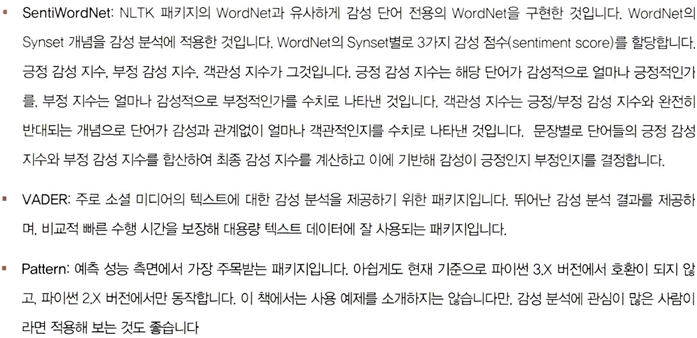

**SentiWordNet을 이용한 감성분석**

In [10]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

- WordNet 모듈을 임포트해서 'present' 단어에 대한 Synset을 추출
- WordNet의 synsets()는 파라미터로 지정된 단어에 대해 WordNet에 등재된 모든 Synset 객체를 반환

In [11]:
from nltk.corpus import wordnet as wn

term = 'present'

# 'present'라는 단어로 wordnet의 synsets 생성
synsets = wn.synsets(term)
print('synsets() 반환 type:', type(synsets))
print('synsets() 반환 값 개수:', len(synsets))
print('synsets() 반환 값:', synsets)

synsets() 반환 type: <class 'list'>
synsets() 반환 값 개수: 18
synsets() 반환 값: [Synset('present.n.01'), Synset('present.n.02'), Synset('present.n.03'), Synset('show.v.01'), Synset('present.v.02'), Synset('stage.v.01'), Synset('present.v.04'), Synset('present.v.05'), Synset('award.v.01'), Synset('give.v.08'), Synset('deliver.v.01'), Synset('introduce.v.01'), Synset('portray.v.04'), Synset('confront.v.03'), Synset('present.v.12'), Synset('salute.v.06'), Synset('present.a.01'), Synset('present.a.02')]


- synset 객체가 가지는 여러 가지 속성
- POS(Part of Speech, 품사), 정의(Definition), 부명제(Lemma) 등으로 시맨틱적인 요소를 표현할 수 있음


In [12]:
for synset in synsets:
  print('##### Synset name:', synset.name(), '#####')
  print('POS:', synset.lexname())
  print('Definition:', synset.definition())
  print('Lemmas:', synset.lemma_names())

##### Synset name: present.n.01 #####
POS: noun.time
Definition: the period of time that is happening now; any continuous stretch of time including the moment of speech
Lemmas: ['present', 'nowadays']
##### Synset name: present.n.02 #####
POS: noun.possession
Definition: something presented as a gift
Lemmas: ['present']
##### Synset name: present.n.03 #####
POS: noun.communication
Definition: a verb tense that expresses actions or states at the time of speaking
Lemmas: ['present', 'present_tense']
##### Synset name: show.v.01 #####
POS: verb.perception
Definition: give an exhibition of to an interested audience
Lemmas: ['show', 'demo', 'exhibit', 'present', 'demonstrate']
##### Synset name: present.v.02 #####
POS: verb.communication
Definition: bring forward and present to the mind
Lemmas: ['present', 'represent', 'lay_out']
##### Synset name: stage.v.01 #####
POS: verb.creation
Definition: perform (a play), especially on a stage
Lemmas: ['stage', 'present', 'represent']
##### Synset n

synset 객체는 단어 간의 유사도를 나타내기 위해서 path_similarity() 메서드 제공.

In [13]:
# 단어의 상호 유사도
tree = wn.synset('tree.n.01')
lion = wn.synset('lion.n.01')
tiger = wn.synset('tiger.n.02')
cat = wn.synset('cat.n.01')
dog = wn.synset('dog.n.01')

entities = [tree, lion, tiger, cat, dog]
similarities = []
entity_names = [entity.name().split('.')[0] for entity in entities]

# 단어별 synset을 반복하면서 다른 단어의 synset과 유사도 측정
for entity in entities:
  similarity = [round(entity.path_similarity(compared_entity), 2) for compared_entity in entities]
  similarities.append(similarity)

# 개별 단어별 synset과 다른 단어의 synset과의 유사도를 DataFrame 형태로 저장
similarity_df = pd.DataFrame(similarities, columns=entity_names, index=entity_names)
similarity_df

,tree,lion,tiger,cat,dog
tree,1.00,0.07,0.07,0.08,0.12
lion,0.07,1.00,0.33,0.25,0.17
tiger,0.07,0.33,1.00,0.25,0.17
cat,0.08,0.25,0.25,1.00,0.20
dog,0.12,0.17,0.17,0.20,1.00


In [14]:
import nltk
from nltk.corpus import sentiwordnet as swn

senti_synsets = list(swn.senti_synsets('slow'))
print('senti_synsets() 반환 type:', type(senti_synsets))
print('senti_synsets() 반환 값 개수:', len(senti_synsets))
print('senti_synstes() 반환 값:', senti_synsets)

senti_synsets() 반환 type: <class 'list'>
senti_synsets() 반환 값 개수: 11
senti_synstes() 반환 값: [SentiSynset('decelerate.v.01'), SentiSynset('slow.v.02'), SentiSynset('slow.v.03'), SentiSynset('slow.a.01'), SentiSynset('slow.a.02'), SentiSynset('dense.s.04'), SentiSynset('slow.a.04'), SentiSynset('boring.s.01'), SentiSynset('dull.s.08'), SentiSynset('slowly.r.01'), SentiSynset('behind.r.03')]


SentiSynet 객체는 단어의 감수성을 나타내는 감성 지수와 객관성을 나타내는 객관성 지수를 가지고 있음

- 감성 지수는 긍정 감정 지수와 부정 감정 지수로 나뉨. 어떤 단어가 전혀 감성적이지 않으면 객관성 지수는 1이 되고, 감성 지수는 모두 0이 됨.

In [15]:
import nltk
from nltk.corpus import sentiwordnet as swn

father = swn.senti_synset('father.n.01')
print('father 긍정감성 지수:', father.pos_score())
print('father 부정감성 지수:', father.neg_score())
print('father 객관성 지수:', father.obj_score())
print('\n')
fabulous = swn.senti_synset('fabulous.a.01')
print('fabulous 긍정감성 지수:', fabulous.pos_score())
print('fabulouns 부정감성 지수:', fabulous.neg_score())

father 긍정감성 지수: 0.0
father 부정감성 지수: 0.0
father 객관성 지수: 1.0


fabulous 긍정감성 지수: 0.875
fabulouns 부정감성 지수: 0.125


**SentiWordNet을 이용한 영화 감상평 분석**

개략적은 순서

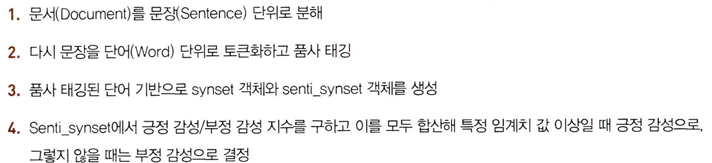

sentiWordNet을 이용하기 위해서는 WordNet를 이용해 문서를 다시 단어로 토큰화한 뒤 어근 추출과 품사 태깅을 적용해야 함.

In [16]:
# 품사 태깅 수행 내부 함수 생성

from nltk.corpus import wordnet as wn

# 간단한 NLTK PennTreebank Tag를 기반으로 WordNet 기반의 품사 Tag로 변환
def penn_to_wn(tag):
  if tag.startswith('J'):
    return wn.ADJ
  elif tag.startswith('N'):
    return wn.NOUN
  elif tag.startswith('R'):
    return wn.ADV
  elif tag.startswith('V'):
    return wn.VERB

문서를 문장 -> 단어 토근 -> 품사 태깅 후에 SentiSynet 클래스 생성하고 Polarity Score을 합산하는 함수 생성.

각 단어의 긍정 감성 지수와 부정 감성 지수를 모두 합한 총 감성 지수가 0 이상일 경우 긍정 감성, 그렇지 않으면 부정 감성으로 예측

In [17]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag

def swn_polarity(text):
    # 감성 지수 초기화
    sentiment = 0.0
    tokens_count = 0

    lemmatizer = WordNetLemmatizer()
    raw_sentences = sent_tokenize(text)
    # 분해된 문장별로 단어 토큰 -> 품사 태깅 후에 SentiSynset 생성 -> 감성 지수 합산
    for raw_sentence in raw_sentences:
        # NLTK 기반의 품사 태깅 문장 추출
        tagged_sentence = pos_tag(word_tokenize(raw_sentence))
        for word, tag in tagged_sentence:

            # WordNet 기반 품사 태깅과 어근 추출
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN , wn.ADJ, wn.ADV):
                continue
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
            # 어근을 추출한 단어와 WordNet 기반 품사 태깅을 입력해 Synset 객체를 생성
            synsets = wn.synsets(lemma , pos=wn_tag)
            if not synsets:
                continue
            # sentiwordnet의 감성 단어 분석으로 감성 synset 추출
            # 모든 단어에 대해 긍정 감성 지수는 +로 부정 감성 지수는 -로 합산해 감성 지수 계산
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
            sentiment += (swn_synset.pos_score()-swn_synset.neg_score())
            tokens_count += 1

    if not tokens_count:
        return 0

    # 총 score가 0 이상일 경우 긍정(Positive) 1, 그렇지 않을 경우 부정(Negative) 0 반환
    if sentiment >= 0:
        return 1

    return 0

In [18]:
review_df['preds'] = review_df['review'].apply(lambda x: swn_polarity(x))
y_target = review_df['sentiment'].values
preds = review_df['preds'].values

In [19]:
# SentiWordNet의 감성 분석 예측 성능

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score
import numpy as np

print(confusion_matrix(y_target, preds))
print('정확도:', np.round(accuracy_score(y_target, preds), 4))
print('정밀도:', np.round(precision_score(y_target, preds), 4))
print('재현율:', np.round(recall_score(y_target, preds), 4))

[[7668 4832]
 [3636 8864]]
정확도: 0.6613
정밀도: 0.6472
재현율: 0.7091


**VADER를 이용한 감성 분석**

소셜 미디어의 감성 분석 용도로 만들어진 룰 기반의 Lexicon.

NLTK는 SentimentInensityAnalyzer 클래스를 이용해 쉽게 감성 분석을 제공.

VADER는 NLTK 패키지의 서브 모듈로 제공될 수도 있고 단독 패키지로 제공될 수도 있음.

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

senti_analyzer = SentimentIntensityAnalyzer()
senti_scores = senti_analyzer.polarity_scores(review_df['review'][0])
print(senti_scores)

{'neg': 0.13, 'neu': 0.743, 'pos': 0.127, 'compound': -0.7943}


- SentimentIntensityAnalyzer 객체 생성
- polarity_scores() : 감성 점수 구함

-> 해당 문서의 감성 점수가 특정 임계값 이상으면 긍정, 그렇지 않으면 부정.

In [ ]:
def vader_polarity(review, threshold=0.1):
  analyzer = SentimentIntensityAnalyzer()
  scores = analyzer.polarity_scores(review)

  # compound 값에 기반해 threshold 입력값보다 크면 1, 그렇지 않으면 0을 반환
  agg_score = scores['compound']
  final_sentiment = 1 if agg_score>=threshold else 0
  return final_sentiment

# apply lambda 식을 이용해 레코드별로 vader_polarity()를 수행하고 결과를 'vader_preds'에 저장
review_df['vader_preds'] = review_df['review'].apply(lambda x:vader_polarity(x, 0.1))
y_target = review_df['sentiment'].values
vader_preds = review_df['vader_preds'].values

print(confusion_matrix(y_target, vader_preds))
print('정확도:', np.round(accuracy_score(y_target, vader_preds), 4))
print('정밀도:', np.round(precision_score(y_target, vader_preds), 4))
print('재현율:', np.round(recall_score(y_target, vader_preds), 4))